# COGS 108 - Final Project (change this to your project's title)

<h1><a href="https://drive.google.com/file/d/1xmfes9IP1iozrRmKh65glpn_2M0vhymA/view?usp=sharing"> Presentation Video </a> </h1>

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Yasushi Oh
- Nancy Shen
- Taggert Smith
- Katelyn Villamin

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

Has the presence of PokeStops in Californian restaurants or cafes increased their traffic as measured by the frequency of Yelp check-ins? We will examine yelp check-ins frequency alongside the rate of Pokemon Go players over time, focusing on the initial release period in 2016.

## Background and Prior Work

The mobile game Pokémon Go has captivated the world since its 2016 release, drawing in millions of players who explored their surroundings through augmented reality (AR). By integrating location-based services, Pokémon Go influences real-world activities, as users seek "Pokéstops" and "Gyms" in various neighborhoods, which can, in turn, impact local businesses. The interaction between AR applications and physical businesses has become a point of interest, especially regarding how these digital engagements may affect the performance and reputation of nearby establishments.<a name="cite_ref-5"></a>[<sup>5</sup>](#cite_note-5) Given the sustained popularity of Pokémon Go, understanding its impact on local businesses is particularly relevant as other AR-based applications begin to emerge.

Previous research has explored the intersection between Pokémon Go and local businesses, particularly focusing on the impact of nearby Pokéstops on restaurants' online reputations. Zhang and Zhang (2018) investigated whether the proximity to Pokéstops could enhance restaurant reviews, finding a positive correlation between nearby game locations and improved online rating suggests that the increased foot traffic from game players could translate into better business performance and online presence.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Similarly, Kondamudi et al. (2017) analyzed Yelp reviews to measure the impact of Pokémon Go on customer feedback.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) Their study revealed that restaurants and cafes near Pokéstops experienced a notable increase in reviews during the game's peak popularity, indicating heightened customer engagement and potentially increased sales. Zhu (2016) highlighted real-world strategies employed by restaurants to capitalize on the game's popularity, such as offering promotions to attract players.<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4) Furthermore, Kondamudi et al. (2021) and Zhang and Zhang (2021) have expanded on these findings, examining how AR games like Pokémon Go can significantly affect local businesses by increasing customer visits and sales.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) These insights underscomic implications of AR gaming and its potential to influence consumer behavior in the real world.

1. <a name="cite_note-1" href=""></a> [^](#cite_ref-1) Zhang, Y., Zhang, J. (2018) Could Nearby Pokéstops Improve Restaurants’ Online Reputation? *Hawaii International Conference on System Sciences*. https://scholarspace.manoa.hawaii.edu/server/api/core/bitstreams/748cbb5b-9718-45eb-b4ca-c5faeda1a959/content 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Kondamudi, P., Protano, B., Alhoori, H. (25 June 2017) Pokemon Go: Impact on Yelp Reviews. *Web Science Conference ‘17* https://dl.acm.org/doi/abs/10.1145/3091478.3098861
3. <a name="cite_note-3"></a> [^](#cite_ref-2) Zhang, Y., Zhang J. (30 October 2021) Catch them all: Impact of location-based augmented reality mobile applications on local businesses. *Information & Management Volume 58, Issue 8* https://www.sciencedirect.com/science/article/pii/S0378720621001245
4. <a name="cite_note-4"></a> [^](#cite_ref-2) Yehong Zhu (16 July 2016) 5 Brilliant Ways Restaurants Are Using Pokémon Go To Level Up Sales. *Forbes* https://www.forbes.com/sites/yehongzhu/2016/07/16/5-brilliant-ways-restaurants-are-using-pokemon-go-to-level-up-sales/
5. <a name="cite_note-4"></a> [^](#cite_ref-2) Pamuru, V., Khern-am-nuai, W., Kannan, Karthik (21 April 2021) The Impact of an Augmented-Reality Game on Local Business: A study of Pokemon Go on Restaurants. *Information System Research Volume 32, Issue 3*  https://pubsonline.informs.org/doi/10.1287/isre.2021.1004

# Hypothesis


We predict that PokéStops in Pokémon Go positively impact foot traffic at nearby locations, as seen by the frequency of Yelp check-ins. Since Pokémon Go saw a surge in popularity at launch, we believe that restaurants designated as PokéStops would have experienced a noticeable increase in visitors, resulting in a rise in the number of check-ins as well.

# Data

## Data overview


- Dataset #1: 
  - Dataset Name: PokéStop Coordinates
  - Link to the dataset: https://www.pogomap.info/ 
  - Number of observations: 386
  - Number of variables: 2 (latitude, longitude)
- Dataset #2: 
  - Dataset Name: Yelp Reviews: business.json
  - Link to the dataset: https://www.yelp.com/dataset/documentation/main 
  - Number of observations: 150,000
  - Number of variables: 8 - business_id, name, address, city, state, zip, latitude, longitude
- Dataset #3: 
  - Dataset Name: Yelp Reviews: checkin.json 
  - Link to the dataset: https://www.yelp.com/dataset/documentation/main 
  - Number of observations: 131,930
  - Number of Variables: 2 - business_id, date 


The first dataset includes the coordinates in terms of longitude and latitude of pokestops and pokegyms where players are more likely to visit to collect rewards. The current dataset was scraped from the link aforementioned and includes coordinates of pokestops and gyms within the downtown Los Angeles area. However, if needed, we are able to adjust the location of pokestop through our code that will scrape data from the website for pokestops and pokegyms in other locations. The data within this dataset is already cleaned as it just consists of a singular list with each pokestops coordinates. If needed, we can incorporate distinctions between pokestops and pokegyms within the dataset for further analysis on whether pokegyms or pokestops have more of a correlation with yelp reviews. 

Dataset 2 is taken from yelp’s official database and includes information on the businesses with yelp reviews, their IDs, names, addresses, and coordinates. We plan on using their addresses and coordinates to match the pokestop information from dataset 1. We’ve cleaned this dataset by querying categories that match restaurant data then querying again for restaurants that are in California. 
Dataset 3 is also taken from yelp’s official database. This dataset includes information about customer interactions with businesses. It’s composed of 2 columns: business_id, and date, where business_id is an unique identifier of each individual business and date is the date during which customers checked in or visited that business. We cleaned this dataset by merging it to the already cleaned dataset 2 using business_id’s in order to find out when customers went to a restaurant. 

We will combine these datasets as follows:
We merge Datasets #2 and #3 by business_id to create a combined dataset with business names and their check in data, and then query for businesses that identify as restaurants.
We filter the resulting dataset by coordinates to include only restaurants in our target area (likely downtown LA)
We calculate the total number of check-ins for each observation in Dataset #2 by month, for each month in our observation period, and add them as columns to each observation in the resulting dataset.
We split the resulting dataset into “Near Pokestop” restaurants and “No Pokestop” restaurants, by checking with Dataset #1 to determine whether they have a pokestop within 80m (the maximum interaction distance in Pokémon GO).

## Imports

In [1]:
import pandas as pd


## Pokéstop Coordinates

In [2]:
#load the data.json file for all the Santa Barbara Pokestop coordinates
pokestop_sb = pd.read_json('data.json')

#split the data so we can see latitude and longitude in separate columns
pokestop_sb[['latitude', 'longitude']] = pokestop_sb[0].str.split(', ', expand=True)

#remove the column that had combined latitudes and longitudes
pokestop_sb = pokestop_sb.drop(columns=0)

#convert str to float for each column
pokestop_sb['latitude'] = pokestop_sb['latitude'].astype('float64')
pokestop_sb['longitude'] = pokestop_sb['longitude'].astype('float64')

pokestop_sb.head()

,latitude,longitude
0,34.439716,-119.731118
1,34.438352,-119.712954
2,34.437364,-119.711571
3,34.437863,-119.713301
4,34.419135,-119.705338


## Yelp Businesses

In [3]:
# #Load business.json and checkin.json as a pandas dataframe
# business_data = pd.read_json("\\Users\\works\\Desktop\\yelp_academic_dataset_business.json", lines=True)
# checkin_data = pd.read_json('\\Users\\works\\Desktop\\yelp_academic_dataset_checkin.json', lines=True)

# Load business.json as a pandas dataframe
business_data = pd.read_json('yelp_academic_dataset_business.json', lines=True)

# Use json_normalize to flatten the structure
business = pd.json_normalize(business_data.to_dict(orient="records"))

#Take only the necessary columns
business_cleaned= business[['business_id','name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'categories']]

#Rename columns
business_cleaned= business_cleaned.rename(columns={'name': 'Name', 'address': 'Street Address', 'city': 'City', 'state': 'State', 'postal_code': 'Zip Code'})

## Yelp Check-ins

In [4]:
# Load checkins.json as a pandas dataframe
checkin_data = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)

# Use json_normalize to flatten the structure
checkin = pd.json_normalize(checkin_data.to_dict(orient="records"))

# Explode the string format checkin dates into separate rows values
checkin['date'] = checkin['date'].str.split(',')
checkin =checkin.explode('date')

In [5]:
#Merge businesses with the checkins
merged= pd.merge(business_cleaned, checkin, how='left', on='business_id')

#Look for businesses that are restaurants only based on categories
categories= ['Food', 'Restaurants', 'Coffee', 'Bars']
pattern= '|'.join(categories)
restaurants= merged[merged['categories'].str.contains(pattern, case=False, na=False)]

#Look for restaurants in CA only
restaurants= restaurants[restaurants['State']== 'CA']
restaurants= restaurants.rename(columns={'date':'Check-in Date'})

restaurants.head()

,business_id,Name,Street Address,City,State,Zip Code,latitude,longitude,categories,Check-in Date
7131,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 21:28:20
7132,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 22:15:29
7133,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 23:35:53
7134,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-12 18:33:30
7135,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-16 19:50:46


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Check-ins by City Barplot

In order to determine the region for our focus, we want to find out which city had the highest number of check ins. To start, we filtered the original dataset to only get the count of check-ins. To visualize it, we created a bar plot of check-in counts against cities.

In [6]:
#Filter the table to find the count of Check-ins by city

#Clean Santa Barbara as there are duplicates
restaurants['City'] = restaurants['City'].replace('Santa  Barbara', 'Santa Barbara')

checkin_count= restaurants.groupby(['City'])['Check-in Date'].count().reset_index().sort_values(by= 'Check-in Date', ascending= False)
checkin_count.head()

,City,Check-in Date
5,Santa Barbara,405539
1,Goleta,79051
0,Carpinteria,27689
2,Isla Vista,20473
3,Montecito,7353


/var/folders/3w/74rrp1d550b3ctq4s54gt0zm0000gn/T/ipykernel_96636/3594356329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(checkin_count, x='City', y= 'Check-in Date', palette= 'pastel')
/var/folders/3w/74rrp1d550b3ctq4s54gt0zm0000gn/T/ipykernel_96636/3594356329.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


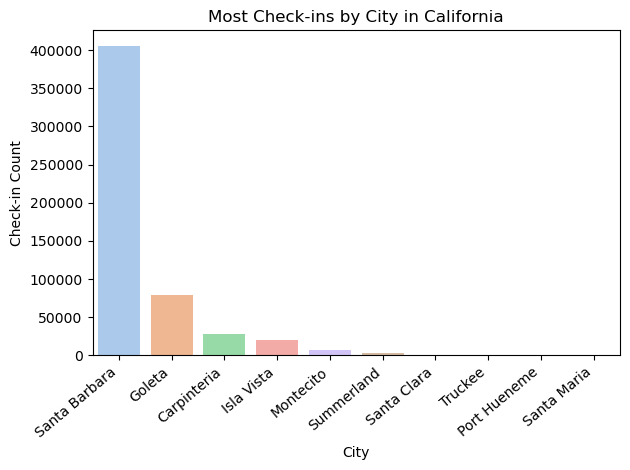

In [7]:
#Bar graph to visualize which city in California had the most check-ins
import seaborn as sns
import matplotlib.pyplot as plt

ax= sns.barplot(checkin_count, x='City', y= 'Check-in Date', palette= 'pastel')

ax.set_title("Most Check-ins by City in California")
ax.set_xlabel("City")
ax.set_ylabel("Check-in Count")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

Here, we see that Santa Barbara had the highest number of check-ins within our timeframe. As such, we decided to put our focus for this project on this city. In order to ensure that the restaurants in our dataset is within the Santa Barbara region of Pokestops, we checked the maximum and minimum coordinates possible.

In [8]:
#find the min and max latitudes and longitudes of pokestops
min_latitude = pokestop_sb['latitude'].min()
min_longitude = pokestop_sb['longitude'].min()
max_latitude = pokestop_sb['latitude'].max()
max_longitude = pokestop_sb['longitude'].max()

print(f"min_dtsb_coords: {min_latitude}, {min_longitude}; max_dtla_coords: {max_latitude}, {max_longitude}")

min_dtsb_coords: 34.403953, -119.881242; max_dtla_coords: 34.440279, -119.510517


In [9]:
#find the min and max latitudes and longitudes of restaurants
restaurants_latitude_max = restaurants['latitude'].max()
restaurants_latitude_min = restaurants['latitude'].min()
restaurants_longitude_max = restaurants['longitude'].max()
restaurants_longitude_min = restaurants['longitude'].min()


print(f"min_restaurant_coords: {restaurants_latitude_min}, {restaurants_longitude_min}; max_restaurant_coords: {restaurants_latitude_max}, {restaurants_longitude_max}")

min_restaurant_coords: 32.321229, -120.083748; max_restaurant_coords: 39.382812, -111.046396


In [10]:
#query restuarants dataframe so that it only shows restaurants within the Santa Barbara area
latitude_query = (restaurants['latitude'] >= min_latitude) & (restaurants['latitude'] <= max_latitude)
longitude_query = (restaurants['longitude'] >= min_longitude) & (restaurants['longitude'] <= max_longitude)
restaurants_sb = restaurants[ latitude_query & longitude_query]
restaurants_sb.head()

,business_id,Name,Street Address,City,State,Zip Code,latitude,longitude,categories,Check-in Date
7131,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 21:28:20
7132,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 22:15:29
7133,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 23:35:53
7134,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-12 18:33:30
7135,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-16 19:50:46


### Pokestops Heat Map

To initially visualize the correlation between pokestops and checkins, we took in the coordinates of restaurant checkins and compared it with the coordinates of Pokestops in Santa Barbara. From here, we saw that restaurants with nearby Pokestops tended to have a higher number of check-ins compared to restaurants without Pokestops nearby.

In [11]:
!pip3 install folium

import folium
from folium.plugins import HeatMapWithTime

In [ ]:
# Assuming `restaurants_sb` and `pokemaps` are loaded as DataFrames
restaurants_sb['coordinates'] = list(zip(restaurants_sb['latitude'], restaurants_sb['longitude']))
grouped = restaurants_sb.groupby(['coordinates', 'Check-in Date']).size().reset_index(name='count')

# Calculate cumulative counts
grouped['cumulative_count'] = grouped.groupby('coordinates')['count'].cumsum()

# Prepare data for HeatMapWithTime
dates = sorted(grouped['Check-in Date'].unique())
heatmap_data = [
    [[lat, lon, count] for (lat, lon), count in zip(grouped[grouped['Check-in Date'] == date]['coordinates'], grouped[grouped['Check-in Date'] == date]['cumulative_count'])]
    for date in dates
]

# Create map
base_map = folium.Map(location=[34.427639, -119.711906], zoom_start=5)

# Add Pokemaps points
for _, row in pokestop_sb.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(base_map)

# Add HeatMapWithTime
HeatMapWithTime(
    data=heatmap_data,
    radius=15,
    gradient={0.2: 'green', 0.5: 'yellow', 0.8: 'red'},
    auto_play=True,
    max_opacity=0.8
).add_to(base_map)

base_map.save("restaurants_heatmap.html")

/var/folders/3w/74rrp1d550b3ctq4s54gt0zm0000gn/T/ipykernel_96636/3548566623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_sb['coordinates'] = list(zip(restaurants_sb['latitude'], restaurants_sb['longitude']))


## Check-in Trends Line Graph

To get an initial sense for our hypothesis' viability, we wanted to compare the Yelp check-in data over time for restaurants within and not within the interaction range of a pokestop. To start with, we plot the trend for all restaurants to approximately understand the general trend in the area when it comes to restaurant patronage.

In [12]:
### can change this later, for now it is easier than checking what has been imported so far
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
### can change this later, just strapped for time atm and this makes typing slightly faster
### at the end of this section, I've redefined restaurants_sb = df so y'all should be able to keep using it and ignore my little shortcut
df = restaurants_sb

We need to know the date range of our data to be sure we have enough room on either side of July 2016, and to know how to label our graph.

In [14]:
# Parse 'Check-in Date' as datetime
df['Check-in Date'] = pd.to_datetime(df['Check-in Date'], format='mixed')

# See the time range of our data
print(
    'Date range:',
    df['Check-in Date'].min(),
    'to',
    df['Check-in Date'].max(),
)

Date range: 2010-01-16 20:41:45 to 2022-01-19 16:33:52


/var/folders/3w/74rrp1d550b3ctq4s54gt0zm0000gn/T/ipykernel_96153/4117764018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Check-in Date'] = pd.to_datetime(df['Check-in Date'], format='mixed')


Now we plot the trend lines.

/var/folders/3w/74rrp1d550b3ctq4s54gt0zm0000gn/T/ipykernel_96153/3838447002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Month'] = df['Check-in Date'].dt.to_period('M')


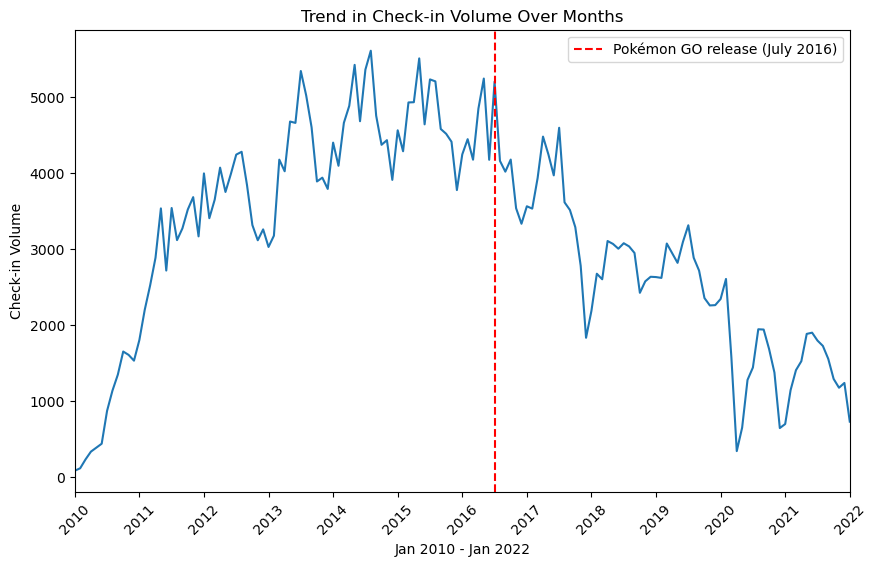

In [15]:
# Extract year and month to create a new column for grouping
df['Year-Month'] = df['Check-in Date'].dt.to_period('M')

# Group by month and count the number of check-ins
checkins_per_month = df.groupby('Year-Month').size()

# Plot the trend over time
plt.figure(figsize=(10, 6))
checkins_per_month.plot(kind='line')

# Add a vertical line to denote PKGO release
vertical_date = pd.Period('2016-07', freq='M') 
plt.axvline(x=vertical_date, color='red', linestyle='--', label='Pokémon GO release (July 2016)')

# Set x-axis ticks to show every year
ticks = checkins_per_month.index[::12]  # Select every 12th month for yearly labels
plt.xticks(ticks=ticks, labels=[str(tick)[:4] for tick in ticks], rotation=45)

# Add title, labels, and legend
plt.title('Trend in Check-in Volume Over Months')
plt.xlabel('Jan 2010 - Jan 2022')
plt.ylabel('Check-in Volume')
plt.xticks(rotation=45)
plt.legend()

plt.show()

It seems that the overall trend in business in this area has been downward since the release of Pokémon GO, with a particularly sudden dip in early 2020 (I wonder why...)
This overall trend will be important for us to consider in our subsequent analyses of the potential affects of Pokestop proximity.

Next, we break this plot down to show the difference in trends between restaurants near pokestops and not near pokestops.

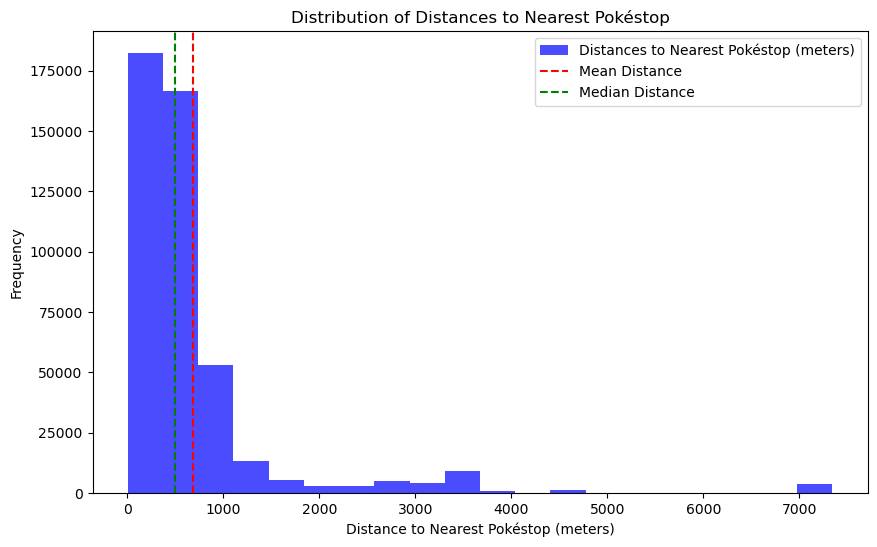

Mean distance (meters): 679.01
Median distance (meters): 497.41


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
### to be technically more accurate should use geopy

#collect pokestop coordinates to check restaurant coordinates against
pokestops = zip(pokestop_sb['latitude'], pokestop_sb['longitude'])

# Function to calculate nearest distances
def calculate_nearest_distances(restaurants, pokestops):
    # Convert zip object to a NumPy array for easier processing
    pokestop_array = np.array(list(pokestops))
    # Extract restaurant coordinates as a NumPy array
    restaurant_array = restaurants[['latitude', 'longitude']].values
    
    # Convert latitude and longitude distances to meters
    mean_latitude = np.mean(restaurants['latitude'])
    meters_per_degree_lat = 111000  # Latitude conversion factor
    meters_per_degree_lon = meters_per_degree_lat * np.cos(np.radians(mean_latitude))  # Longitude conversion factor
    
    # Scale coordinates for both restaurants and Pokéstops
    restaurant_array[:, 0] *= meters_per_degree_lat
    restaurant_array[:, 1] *= meters_per_degree_lon
    pokestop_array[:, 0] *= meters_per_degree_lat
    pokestop_array[:, 1] *= meters_per_degree_lon
    
    # Calculate distances between restaurants and all Pokéstops
    dists = distance.cdist(restaurant_array, pokestop_array, metric='euclidean')
    # Find the minimum distance for each restaurant
    return dists.min(axis=1)

# Calculate nearest distances (in meters)
nearest_distances_meters = calculate_nearest_distances(df, pokestops)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(nearest_distances_meters, bins=20, alpha=0.7, color='blue', label='Distances to Nearest Pokéstop (meters)')
plt.axvline(x=np.mean(nearest_distances_meters), color='red', linestyle='--', label='Mean Distance')
plt.axvline(x=np.median(nearest_distances_meters), color='green', linestyle='--', label='Median Distance')
plt.xlabel('Distance to Nearest Pokéstop (meters)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances to Nearest Pokéstop')
plt.legend()
plt.show()

# Analyze threshold
print(f"Mean distance (meters): {np.mean(nearest_distances_meters):.2f}")
print(f"Median distance (meters): {np.median(nearest_distances_meters):.2f}")

Farther than we expected, unfortunately. Ideally, we would be able to draw the line at 80m, which is the maximum interaction distance between players and pokestops in the game. We'll go with half the mean distance for the purposes of our analysis, to ensure there's enough data in both the near-pokestop and far-from-pokestop group.

In [17]:

def split_restaurants_by_threshold(restaurants, distances, threshold):
    
    # Create a mask for distances within the threshold
    within_threshold_mask = distances <= threshold
    
    # Split the DataFrame based on the mask
    within_threshold = restaurants[within_threshold_mask].copy()
    beyond_threshold = restaurants[~within_threshold_mask].copy()
    
    return within_threshold, beyond_threshold

# Define the threshold in meters
threshold_distance = 497.41 / 2

# Split the restaurants
near_pokestops_df, far_pokestops_df = split_restaurants_by_threshold(
    df, nearest_distances_meters, threshold_distance
)

# Output the results
print(f"Number of restaurants within {threshold_distance} meters of a Pokéstop: {len(near_pokestops_df)}")
print(f"Number of restaurants beyond {threshold_distance} meters of a Pokéstop: {len(far_pokestops_df)}")

Number of restaurants within 248.705 meters of a Pokéstop: 118565
Number of restaurants beyond 248.705 meters of a Pokéstop: 332471


Those are reasonable numbers we can work with. Now to plot the trends...

In [18]:
### fixing my shortcut for teammates
restaurants_sb = df

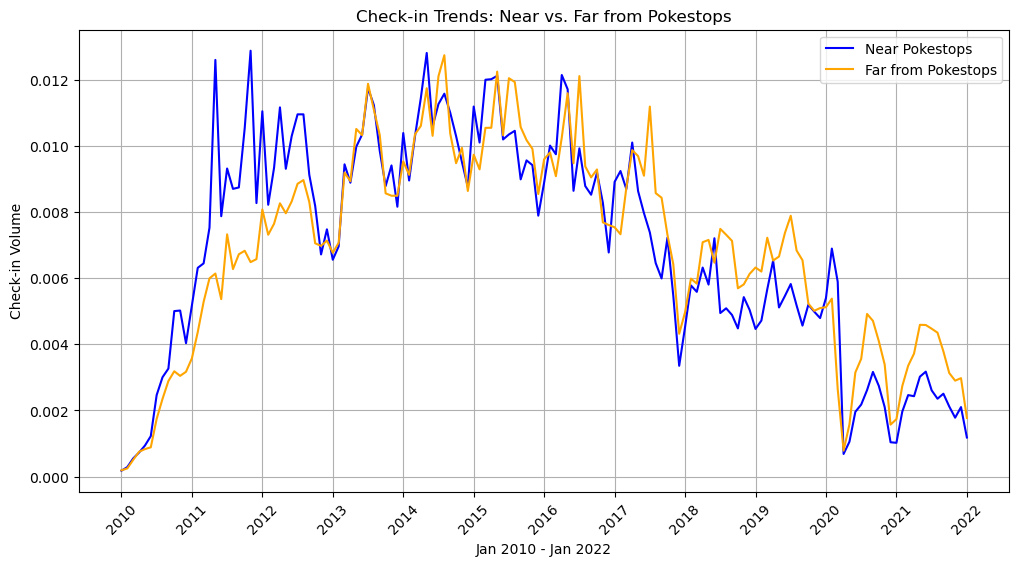

In [19]:
# Group by month and count average check-ins per restaurant
near_trend = near_pokestops_df.groupby('Year-Month').size() / len(near_pokestops_df)
far_trend = far_pokestops_df.groupby('Year-Month').size() / len(far_pokestops_df)

# Plot the trends on the same graph
plt.figure(figsize=(12, 6))
plt.plot(near_trend.index.astype(str), near_trend, label='Near Pokestops', color='blue')
plt.plot(far_trend.index.astype(str), far_trend, label='Far from Pokestops', color='orange')

# Set x-axis ticks to show every year
ticks = checkins_per_month.index[::12].strftime('%Y-%m')
tick_labels = [tick[:4] for tick in ticks] 
plt.xticks(ticks=range(len(checkins_per_month.index))[::12], labels=tick_labels, rotation=45)

# Add labels, title, legend, and grid
plt.title('Check-in Trends: Near vs. Far from Pokestops')
plt.xlabel('Jan 2010 - Jan 2022')
plt.ylabel('Check-in Volume')
plt.xticks(rotation=45)
plt.grid()
plt.legend()


plt.show()

Immediately our graph looks worrying – no clearly visible trend difference after July 2016 and a strange spike in one prior, which may invalidate the Difference-in-Differences analysis we plan to do next. Let's use a statistical test to confirm whether the pre-trends are indeed parallel enough to keep going.

## Difference-in-differences Analysis on check-in trends after July 2016

First, we examine the pre-trend, following the simple test of parallel trends proposed by Riveros-Gavilanes, J. M. (2023): A simple test of parallel pre-trends for Differences-in-Differences. Interpretation: If the coefficient on the interaction term (`Time_Group`) is close to 0 and not significant, it supports the parallel trends assumption.

/var/folders/3w/74rrp1d550b3ctq4s54gt0zm0000gn/T/ipykernel_96153/1368068273.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_treatment['Year-Month'] = pre_treatment['Year-Month'].astype(str)


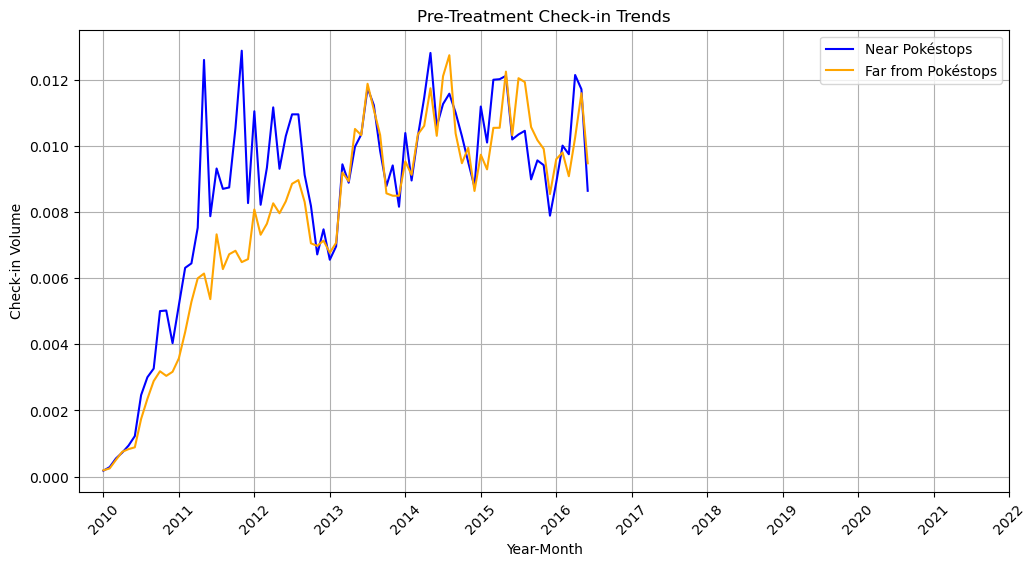

                            OLS Regression Results                            
Dep. Variable:             Difference   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     17.13
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           8.96e-05
Time:                        18:33:26   Log-Likelihood:                 408.36
No. Observations:                  78   AIC:                            -812.7
Df Residuals:                      76   BIC:                            -808.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -1.358e-05   3.28e-06     -4.138      0.0

/var/folders/3w/74rrp1d550b3ctq4s54gt0zm0000gn/T/ipykernel_96153/1368068273.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_treatment_data['Time_Group'] = pre_treatment_data['Time'] * pre_treatment_data['Group']  # Interaction term


In [20]:
import statsmodels.api as sm

# Define the treatment period
treatment_start = "2016-07"  # Example: July 2016 (Pokéstops introduction)

# Add treatment indicator
near_pokestops_df['treatment'] = (near_pokestops_df['Year-Month'] >= treatment_start).astype(int)
far_pokestops_df['treatment'] = (far_pokestops_df['Year-Month'] >= treatment_start).astype(int)

# Aggregate check-ins by month
near_trend = near_pokestops_df.groupby('Year-Month').size() / len(near_pokestops_df)
far_trend = far_pokestops_df.groupby('Year-Month').size() / len(far_pokestops_df)

# Create a DataFrame for analysis
trend_data = pd.DataFrame({
    'Year-Month': near_trend.index,
    'Near_Checkins': near_trend.values,
    'Far_Checkins': far_trend.reindex(near_trend.index, fill_value=0).values  # Ensure matching time periods
})

# Add time variable and treatment indicator
trend_data['Time'] = range(len(trend_data))  # Sequential time index
trend_data['Treatment'] = (trend_data['Year-Month'] >= treatment_start).astype(int)

# Calculate differences
trend_data['Difference'] = trend_data['Near_Checkins'] - trend_data['Far_Checkins']

# Plot pre-treatment trends
plt.figure(figsize=(12, 6))
pre_treatment = trend_data[trend_data['Treatment'] == 0]
pre_treatment['Year-Month'] = pre_treatment['Year-Month'].astype(str)
plt.plot(pre_treatment['Year-Month'], pre_treatment['Near_Checkins'], label="Near Pokéstops", color='blue')
plt.plot(pre_treatment['Year-Month'], pre_treatment['Far_Checkins'], label="Far from Pokéstops", color='orange')

# Set x-axis ticks to show every year
ticks = checkins_per_month.index[::12].strftime('%Y-%m')
tick_labels = [tick[:4] for tick in ticks] 
plt.xticks(ticks=range(len(checkins_per_month.index))[::12], labels=tick_labels, rotation=45)

# show plot
plt.xticks(rotation=45)
plt.title("Pre-Treatment Check-in Trends")
plt.xlabel("Year-Month")
plt.ylabel("Check-in Volume")
plt.legend()
plt.grid()
plt.show()

# Formal parallel trends test using regression
trend_data['Pre_Treatment'] = (trend_data['Treatment'] == 0).astype(int)
trend_data['Group'] = (trend_data['Near_Checkins'] > 0).astype(int)  # 1 for near, 0 for far

# Regression to test for interaction effects in pre-treatment
pre_treatment_data = trend_data[trend_data['Pre_Treatment'] == 1]
pre_treatment_data['Time_Group'] = pre_treatment_data['Time'] * pre_treatment_data['Group']  # Interaction term

# Run OLS regression
X = sm.add_constant(pre_treatment_data[['Time', 'Group', 'Time_Group']])
y = pre_treatment_data['Difference']
model = sm.OLS(y, X).fit()

print(model.summary())

The coefficient on the interaction term (`Time_Group`) is close to 0 and not significant, thus it supports the parallel trends assumption and we can continue with the Difference-in-Difference analysis.

In [21]:
# Combine the datasets
near_pokestops_df['Group'] = 1  # 1 for near-pokestop restaurants
far_pokestops_df['Group'] = 0  # 0 for far-pokestop restaurants
combined_df = pd.concat([near_pokestops_df, far_pokestops_df])

# Ensure 'Year-Month' is converted from Period to datetime
combined_df['Year-Month'] = combined_df['Year-Month'].dt.to_timestamp()

# Define Treatment variable
treatment_start = "2016-07"  # Define treatment start month
combined_df['Treatment'] = (combined_df['Year-Month'] >= treatment_start).astype(int)

# Aggregate check-ins by month and group
agg_data = combined_df.groupby(['Year-Month', 'Group', 'Treatment']).size().reset_index(name='Checkins')

# Create interaction term
agg_data['Interaction'] = agg_data['Group'] * agg_data['Treatment']

# Run the Difference-in-Differences regression
import statsmodels.api as sm
X = sm.add_constant(agg_data[['Group', 'Treatment', 'Interaction']])
y = agg_data['Checkins']

model = sm.OLS(y, X).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Checkins   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.96e-48
Time:                        18:33:27   Log-Likelihood:                -2319.6
No. Observations:                 290   AIC:                             4647.
Df Residuals:                     286   BIC:                             4662.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2589.4744     82.116     31.534      

The interaction term (217.06, p=0.205) captures the difference-in-differences (DiD) effect: the additional change in check-ins for near-Pokéstop restaurants (Group=1) relative to far-from-Pokéstop restaurants (Group=0) after the treatment.

The DiD estimate suggests that near-Pokéstop restaurants saw a positive, but not statistically significant increase (~217 check-ins) compared to far-from-Pokéstop restaurants post-treatment.

# Ethics & Privacy

### Bias

We are aware—thanks to prior work on Pokemon Go hotspot distributions—that PokeStops are concentrated disproportionately in areas with socioeconomically advantaged populations, making it more likely that our selected cases will be from one of those areas, and thus our findings may not be generalizable to disadvantaged populations.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Additionally, by necessity our study will likely draw from areas that have experienced consistent economic success and stability, as our case studies need to have been in business since at least 2016. Moreover, our analysis will be stronger if we look at areas with less historical instability, meaning fewer confounds in our dataset. To mitigate this, we would have intentionally selected from various areas with different socioeconomic statuses (i.e. high traffic low income areas, low traffic low income areas, etc.) to attempt to balance out the biases in our overall dataset. However, due to the limitations of the Yelp data we were able to find, we only have the one small area that we can examine, and thus there would be little use in further breaking down the data geographically. Additionally and unavoidably, due to the nature of Pokemon Go as an online AR video game, we are focused on only people with smartphones and cellular data, resulting in a selection bias. 

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Colley, Ashley, et al. "The Geography of PokémonGO: Beneficial and Problematic Effects on Places and Movement." Proceedings of the 2017 CHI Conference on Human Factors in Computing Systems. ACM 2017. https://dl.acm.org/doi/10.1145/3025453.3025495

### Risk

Thankfully, the Yelp check-in data we collected was completely anonymized. However, it will be more difficult to anonymize the establishments we look at, as their location data is relevant to our study, and our paper could have unforeseen consequences for those specific establishments. To address this, we have avoided looking at any individual cases, and instead plot the trends of Santa Barbara restaurants in aggregate.

### Fraud

We will also consult prior work regarding the use of Yelp review data, such as [this paper](https://pubsonline.informs.org/doi/epdf/10.1287/mnsc.2015.2304) on Yelp review fraud, to understand the potential impacts on the results and ethics of our project.

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

#### All
- Background research
- Finding datasets
- Research question & hypothesis

#### Taggert 
- Parallel trends visualization & analysis
- Difference-in-difference analysis

#### Yasushi 
- Pokestop data scraping
- Heat map

#### Nancy
- Describing and cleaning datasets

#### Katelyn 
- Check ins by city bar plot
